In [188]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [189]:
# import the `Categorries` table
path = 'F:\\work in excel\\Ahmed Ali Project\\CSV project\\Categories.csv'
categories = pd.read_csv(path)

# import the `Customers` table
path1 = 'F:\\work in excel\\Ahmed Ali Project\\CSV project\\Customers.csv'
Customers = pd.read_csv(path1, encoding='latin1')

# import the `Orders` table
path2 = 'F:\\work in excel\\Ahmed Ali Project\\CSV project\\Orders.csv'
Orders = pd.read_csv(path2, encoding='latin1')

# import the `OrdersDetails` table
path3 = 'F:\\work in excel\\Ahmed Ali Project\\CSV project\\OrdersDetails.csv'
OrdersDetails = pd.read_csv(path3, encoding='latin1')

# import the `Products` table
path4 = 'F:\\work in excel\\Ahmed Ali Project\\CSV project\\Products.csv'
Products = pd.read_csv(path4, encoding='latin1')

In [190]:
# drop the Picture column becouse a whole columns is null
categories = categories.drop('Picture', axis=1)

In [191]:
# Get the shapes of each DataFrame
print("Orders shape:", Orders.shape)
print("Categories shape:", categories.shape)
print("OrdersDetails shape:", OrdersDetails.shape)
print("Customers shape:", Customers.shape)
print("Products shape:", Products.shape)

Orders shape: (830, 11)
Categories shape: (8, 3)
OrdersDetails shape: (2155, 5)
Customers shape: (91, 9)
Products shape: (77, 8)


In [192]:
# Merging 'OrdersDetails' with 'Orders' based on the 'OrderID' column using a left join
data = pd.merge(OrdersDetails, Orders, how='left', on='OrderID')

In [193]:
# Merging 'data' with 'Customers' based on the 'CustomerID' column using a left join
data = pd.merge(data, Customers, how='left', on='CustomerID')

In [194]:
# Merging 'data' with 'Products' based on the 'ProductID' column using a left join
data = pd.merge(data, Products, how='left', on='ProductID')

In [195]:
# Merging 'data' with 'categories' based on the 'CategoryID' column using a left join
data = pd.merge(data, categories, how='left', on='CategoryID')

In [223]:
data.sample(2)

,OrderID,ProductID,UnitPrice_x,Quantity,Discount,CustomerID,EmployeeID,OrderDate,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice_y,UnitsInStock,UnitsOnOrder,CategoryName,Description
160,10307,68,10.0,3,0.0,LONEP,2,1996-09-17,0.56,Lonesome Pine Restaurant,89 Chiaroscuro Rd.,Portland,OR,97219,USA,Lonesome Pine Restaurant,Fran Wilson,Sales Manager,89 Chiaroscuro Rd.,Portland,OR,97219,USA,Scottish Longbreads,8,3,10 boxes x 8 pieces,12.5,6,10,sweets,"Desserts, candies, and sweet breads"
2040,11037,70,15.0,4,0.0,GODOS,7,1998-04-21,3.20,Godos Cocina Típica,"C/ Romero, 33",Sevilla,Other,41101,Spain,Godos Cocina Típica,José Pedro Freyre,Sales Manager,"C/ Romero, 33",Sevilla,Other,41101,Spain,Outback Lager,7,1,24 - 355 ml bottles,15.0,15,10,fresh,"Soft drinks, coffees, teas, beers, and ales"


### Handling The Missing Values

In [196]:
data.isna().sum().sort_values(ascending=False)

Region             1325
ShipRegion         1299
ShipPostalCode       55
PostalCode           55
OrderID               0
ProductName           0
City                  0
Country               0
SupplierID            0
ContactTitle          0
CategoryID            0
QuantityPerUnit       0
UnitPrice_y           0
UnitsInStock          0
UnitsOnOrder          0
CategoryName          0
Address               0
ContactName           0
ProductID             0
CompanyName           0
ShipCountry           0
ShipCity              0
ShipAddress           0
ShipName              0
Freight               0
OrderDate             0
EmployeeID            0
CustomerID            0
Discount              0
Quantity              0
UnitPrice_x           0
Description           0
dtype: int64

In [197]:
missing_data = data[['Region', 'ShipRegion', 'ShipPostalCode', 'PostalCode']]

In [198]:
for i in missing_data:
    print(i)
    print(missing_data[i].value_counts())
    print('-' * 80)

# We don't have a very different value to replace it using `mood`
# If we replace 'region' and 'shipping area' with mood, the first value will be a much larger number than the others

Region
Region
SP               122
ID               116
RJ                83
NM                71
Co. Cork          55
OR                52
WA                51
Táchira           45
BC                43
Nueva Esparta     35
Lara              34
Québec            32
AK                26
Isle of Wight     23
WY                20
CA                10
MT                 8
DF                 4
Name: count, dtype: int64
--------------------------------------------------------------------------------
ShipRegion
ShipRegion
SP               120
ID               116
RJ                83
NM                71
Co. Cork          55
OR                52
WA                51
Táchira           45
BC                43
Nueva Esparta     35
Lara              34
Québec            32
Essex             30
AK                24
Isle of Wight     23
WY                20
CA                10
MT                 8
DF                 4
Name: count, dtype: int64
------------------------------------------------------

In [199]:
# fill Null values by `Other`
data[['Region', 'ShipRegion', 'ShipPostalCode', 'PostalCode']] = data[['Region', 'ShipRegion', 'ShipPostalCode', 'PostalCode']].fillna('Other')

In [200]:
data.isna().sum().sum()

0

### Hanling the Data types

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          2155 non-null   int64  
 1   ProductID        2155 non-null   int64  
 2   UnitPrice_x      2155 non-null   float64
 3   Quantity         2155 non-null   int64  
 4   Discount         2155 non-null   float64
 5   CustomerID       2155 non-null   object 
 6   EmployeeID       2155 non-null   int64  
 7   OrderDate        2155 non-null   object 
 8   Freight          2155 non-null   object 
 9   ShipName         2155 non-null   object 
 10  ShipAddress      2155 non-null   object 
 11  ShipCity         2155 non-null   object 
 12  ShipRegion       2155 non-null   object 
 13  ShipPostalCode   2155 non-null   object 
 14  ShipCountry      2155 non-null   object 
 15  CompanyName      2155 non-null   object 
 16  ContactName      2155 non-null   object 
 17  ContactTitle  

In [202]:
# convert the type of `OrderDate` => Date           
data['OrderDate'] = pd.to_datetime(data['OrderDate'])

# convert the type of `Freight`   => float     
data['Freight'] = data['Freight'].str.replace(',', '').astype(float)

# convert the type of `UnitPrice_y`   => float 
data['UnitPrice_y'] = data['UnitPrice_y'].str.replace(',', '').astype(float)

In [203]:
data.describe()

,OrderID,ProductID,UnitPrice_x,Quantity,Discount,EmployeeID,OrderDate,Freight,SupplierID,CategoryID,UnitPrice_y,UnitsInStock,UnitsOnOrder
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155,2155.000000,2155.000000,2155.000000,2.155000e+03,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167,4.333179,1997-08-05 06:12:11.693735424,96.197726,14.488167,4.135499,4.523458e+06,39.795824,8.074246
min,10248.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1996-07-04 00:00:00,0.020000,1.000000,1.000000,2.500000e+00,0.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000,2.000000,1997-02-19 00:00:00,19.610000,7.000000,2.000000,1.250000e+01,17.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000,4.000000,1997-09-04 00:00:00,53.800000,14.000000,4.000000,1.945000e+01,25.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000,7.000000,1998-01-31 12:00:00,120.920000,21.000000,6.000000,3.400000e+01,57.000000,0.000000
max,11077.000000,77.000000,263.500000,130.000000,0.250000,9.000000,1998-05-06 00:00:00,1007.640000,29.000000,8.000000,4.000000e+08,125.000000,100.000000
std,241.378032,22.159019,29.827418,19.022047,0.083450,2.490351,NaN,133.011272,8.228640,2.378567,4.198254e+07,36.055668,19.748983


### Hangling the Outlier

In [204]:
# Filter out rows where 'UnitPrice_y' is great than 4000000
filtered_data = data[~(data['UnitPrice_y'] >= 4000000)]

# Calculate the mean of the 'UnitPrice_y' column in the filtered data, rounded to 2 decimal places
round(filtered_data['UnitPrice_y'].mean(),2)

25.05

In [205]:
# replace the data great than `4000000` to the mean of `UnitPrice_y`
condition = data['UnitPrice_y'] >= 4000000
data.loc[condition, 'UnitPrice_y'] = 25.60

### Check for duplicate values

In [206]:
data.duplicated().sum()

0

### Splitting the object data and check if the data contains duplicate value using different characters or upper and lower case letters

In [207]:
Object_data = data.select_dtypes(include=['object'])

In [208]:
for i in Object_data:
    print(i)
    print('The Real Data')
    print(Object_data[i].nunique())
    print('The Lower Data')
    print(Object_data[i].str.lower().nunique())

    print('-'*80)

CustomerID
The Real Data
89
The Lower Data
89
--------------------------------------------------------------------------------
ShipName
The Real Data
89
The Lower Data
89
--------------------------------------------------------------------------------
ShipAddress
The Real Data
89
The Lower Data
89
--------------------------------------------------------------------------------
ShipCity
The Real Data
70
The Lower Data
70
--------------------------------------------------------------------------------
ShipRegion
The Real Data
20
The Lower Data
20
--------------------------------------------------------------------------------
ShipPostalCode
The Real Data
85
The Lower Data
85
--------------------------------------------------------------------------------
ShipCountry
The Real Data
21
The Lower Data
21
--------------------------------------------------------------------------------
CompanyName
The Real Data
89
The Lower Data
89
--------------------------------------------------------------

In [209]:
for column in Object_data:
    print(column)
    print(Object_data[column].str.lower().value_counts())
    print(Object_data[column].str.lower().nunique())
    # print(Object_data[column].nunique())
    print('-' * 80)

CustomerID
CustomerID
savea    116
ernsh    102
quick     86
rattc     71
hungo     55
bergs     52
frank     48
hilaa     45
folko     45
bonap     44
whitc     40
queen     40
koene     39
lehms     39
suprd     39
warth     37
linod     35
bottm     35
lilas     34
hanar     32
merep     32
vaffe     31
lamai     31
arout     30
ricsu     30
tortu     29
ricar     27
blonp     26
oldwo     26
godos     26
wandk     26
seves     26
victe     25
ottik     25
quede     24
picco     23
islat     23
bsbev     22
reggc     22
chops     22
greal     22
magaa     21
eastc     21
furib     20
wilmk     20
splir     20
gourl     19
famia     19
welli     19
anton     17
maisd     17
folig     16
wolza     16
santg     16
tradh     15
simob     15
lonep     14
blaus     14
romey     14
peric     14
ranch     12
tomsp     12
prini     12
alfki     12
cactu     11
ocean     11
lacor     11
morgk     11
letss     10
frans     10
dracd     10
commi     10
anatr     10
traih      9
hungc      9
dum

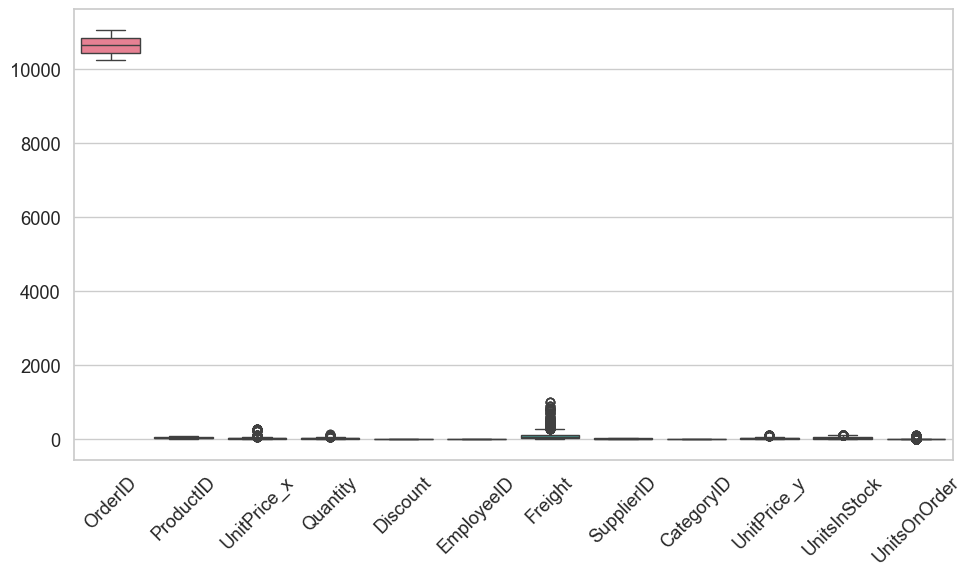

In [222]:
plt.figure(figsize=(10, 6))  
sns.boxplot(data=data)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [225]:
data.sample(1)

,OrderID,ProductID,UnitPrice_x,Quantity,Discount,CustomerID,EmployeeID,OrderDate,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice_y,UnitsInStock,UnitsOnOrder,CategoryName,Description
1182,10697,70,15.0,30,0.25,LINOD,3,1997-10-08,45.52,LINO-Delicateses,Ave. 5 de Mayo Porlamar,I. de Margarita,Nueva Esparta,4980,Venezuela,LINO-Delicateses,Felipe Izquierdo,Owner,Ave. 5 de Mayo Porlamar,I. de Margarita,Nueva Esparta,4980,Venezuela,Outback Lager,7,1,24 - 355 ml bottles,15.0,15,10,fresh,"Soft drinks, coffees, teas, beers, and ales"


In [229]:
# Rename the columns
data.rename(columns={'UnitPrice_x' : 'UnitPrice_Order', 'UnitPrice_y' : 'UnitPrice_Product'}, inplace=True)


In [230]:
data1 = data[['ProductID', 'ProductName', 'QuantityPerUnit', 'CategoryID', 'CategoryName', 'Description', 
              'OrderID', 'OrderDate', 'CustomerID', 'Country', 'City', 'Region',  
              'SupplierID', 'ShipName', 'ShipAddress', 'ShipCity', 'ShipCountry', 'ShipRegion', 'ShipPostalCode',
              'Freight', 'EmployeeID', 'CompanyName', 'ContactName', 'ContactTitle', 'Address',
              'PostalCode', 'UnitsInStock', 'UnitsOnOrder', 'UnitPrice_Order', 'UnitPrice_Product', 
              'Quantity', 'Discount']]


In [232]:
data1

,ProductID,ProductName,QuantityPerUnit,CategoryID,CategoryName,Description,OrderID,OrderDate,CustomerID,Country,City,Region,SupplierID,ShipName,ShipAddress,ShipCity,ShipCountry,ShipRegion,ShipPostalCode,Freight,EmployeeID,CompanyName,ContactName,ContactTitle,Address,PostalCode,UnitsInStock,UnitsOnOrder,UnitPrice_Order,UnitPrice_Product,Quantity,Discount
0,11,Queso Cabrales,1 kg pkg.,4,cheese,Cheeses,10248,1996-07-04,WILMK,Finland,Helsinki,Other,5,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,France,Other,51100,32.38,5,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,21240,22,30,14.00,21.00,12,0.00
1,42,Singaporean Hokkien Fried Mee,32 - 1 kg pkgs.,5,breads,"Breads, crackers, pasta, and cereal",10248,1996-07-04,WILMK,Finland,Helsinki,Other,20,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,France,Other,51100,32.38,5,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,21240,26,0,9.80,14.00,10,0.00
2,72,Mozzarella di Giovanni,24 - 200 g pkgs.,4,cheese,Cheeses,10248,1996-07-04,WILMK,Finland,Helsinki,Other,14,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,France,Other,51100,32.38,5,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,21240,14,0,34.80,34.80,5,0.00
3,14,Tofu,40 - 100 g pkgs.,7,fruits,Dried fruit and bean curd,10249,1996-07-05,TRADH,Brazil,São Paulo,SP,6,Toms Spezialitäten,Luisenstr. 48,Münster,Germany,Other,44087,11.61,6,Tradição Hipermercados,Anabela Domingues,Sales Representative,"Av. Inês de Castro, 414",05634-030,35,0,18.60,23.25,9,0.00
4,51,Manjimup Dried Apples,50 - 300 g pkgs.,7,fruits,Dried fruit and bean curd,10249,1996-07-05,TRADH,Brazil,São Paulo,SP,24,Toms Spezialitäten,Luisenstr. 48,Münster,Germany,Other,44087,11.61,6,Tradição Hipermercados,Anabela Domingues,Sales Representative,"Av. Inês de Castro, 414",05634-030,20,0,42.40,53.00,40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,64,Wimmers gute Semmelknödel,20 bags x 4 pieces,5,breads,"Breads, crackers, pasta, and cereal",11077,1998-05-06,RATTC,USA,Albuquerque,NM,12,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,USA,NM,87110,8.53,1,Rattlesnake Canyon Grocery,Paula Wilson,Assistant Sales Representative,2817 Milton Dr.,87110,22,80,33.25,33.25,2,0.03
2151,66,Louisiana Hot Spiced Okra,24 - 8 oz jars,2,shampoos,"Sweet and savory sauces, relishes, spreads, an...",11077,1998-05-06,RATTC,USA,Albuquerque,NM,2,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,USA,NM,87110,8.53,1,Rattlesnake Canyon Grocery,Paula Wilson,Assistant Sales Representative,2817 Milton Dr.,87110,4,100,17.00,17.00,1,0.00
2152,73,Röd Kaviar,24 - 150 g jars,8,sea,fishes,11077,1998-05-06,RATTC,USA,Albuquerque,NM,17,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,USA,NM,87110,8.53,1,Rattlesnake Canyon Grocery,Paula Wilson,Assistant Sales Representative,2817 Milton Dr.,87110,101,0,15.00,15.00,2,0.01
2153,75,Rhönbräu Klosterbier,24 - 0.5 l bottles,1,fresh,"Soft drinks, coffees, teas, beers, and ales",11077,1998-05-06,RATTC,USA,Albuquerque,NM,12,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,USA,NM,87110,8.53,1,Rattlesnake Canyon Grocery,Paula Wilson,Assistant Sales Representative,2817 Milton Dr.,87110,125,0,7.75,7.75,4,0.00
